In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
df = [(x, x**4) for x in [random.uniform(-10, 10) for _ in range(50)]]
print(f"Base de dados: {df}")

Base de dados: [(-3.56210247248627, 160.99991077503336), (-5.890067715265115, 1203.5971501571453), (2.3835094776086923, 32.275095251750706), (-0.20768638502560677, 0.001860510427336667), (9.26105734006321, 7356.0096893508935), (-8.479006537675541, 5168.682799901262), (7.954490218092253, 4003.588272569771), (6.047216357280043, 1337.27901101123), (2.1491647675990837, 21.334322182040797), (-8.845968377785201, 6123.243499968991), (8.48338116356619, 5179.357898832053), (-3.0576536319931353, 87.40839578052153), (4.595080180267763, 445.83316853498366), (1.644096133154294, 7.306490628569883), (-3.2570777035344767, 112.54144272834213), (4.38959908059635, 371.2781786220182), (9.612163751099331, 8536.594317315925), (-2.149354820744895, 21.34186965904042), (-3.646856052220979, 176.87827133993602), (1.8267611806482584, 11.135945491019914), (-9.890428191008427, 9568.863876289004), (5.976588606220636, 1275.8906362814066), (4.829180520309865, 543.8683179438417), (-4.762649412335849, 514.5107507156164)

In [3]:
def grad(a,b):
  grada = sum([-2*(df[i][1] - a*df[i][0]**4 - b)*(df[i][0]**4) for i in range(len(df))])
  gradb = sum([-2*(df[i][1] - a*df[i][0]**4 - b) for i in range(len(df))])
  return [grada,gradb]

In [4]:
def dist(anterior,novo):
  zs = zip(anterior,novo)
  acc = 0
  for [p1,p2] in zs:
    acc += (p1-p2)**2

  return math.sqrt(acc)

In [5]:
def grad_desc(lr, xn, yn, tol, max_iter=1000000):
    d = float('inf')
    k = 0
    while d > tol and k < max_iter:
        grada, gradb = grad(xn, yn)
        xn1 = xn - lr * grada
        yn1 = yn - lr * gradb
        d = dist([xn, yn], [xn1, yn1])

        if any(abs(val) > 1e100 for val in [xn1, yn1, d]):
            break

        xn, yn = xn1, yn1
        k += 1
    return [xn1, yn1, k]

z = grad_desc(1e-4, 1, 0, 1e-4)
print(f"z: {z}")

z: [1.0, 0.0, 1]


In [6]:
x = [point[0] for point in df]
y = [point[1] for point in df]

a, b = z[0], z[1]
x1 = np.linspace(min(x) - 1, max(x) + 1, 400)
y1 = [a * xx**4 + b for xx in x1]

In [7]:
def format_exponential(number):
    formatted_number = f"{number:.1e}"
    parts = formatted_number.split('e')
    return f"{int(float(parts[0]))}e{int(parts[1])}"

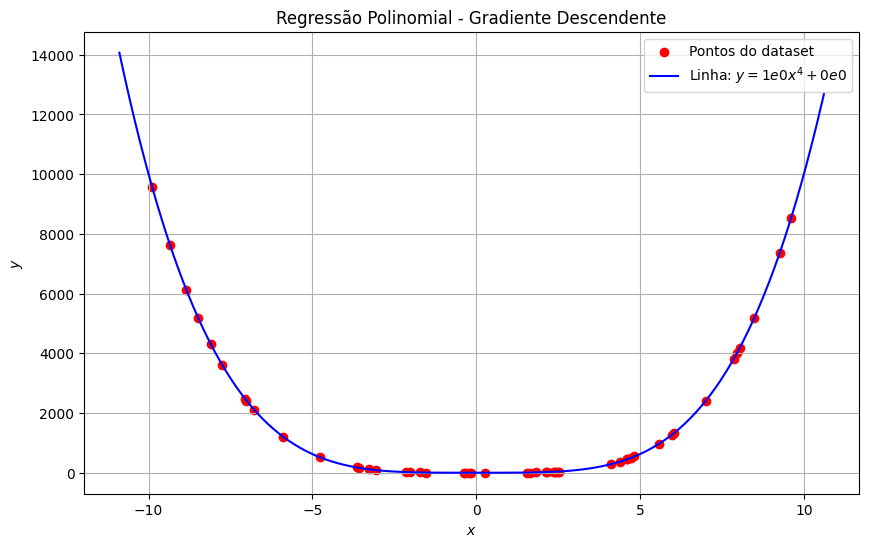

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Pontos do dataset')
plt.plot(x1, y1, color='blue', label=f'Linha: $y = {format_exponential(a)}x^{4} + {format_exponential(b)}$')


plt.title('Regressão Polinomial - Gradiente Descendente')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

plt.show()